Course Wise GPA calculator

Idea:
In many universities, course-wise grading is done on a relative scale, meaning a student's grade depends on how they perform compared to others who have taken the same course. This relative grading system often makes it challenging for students to predict their GPA accurately for a subject.

This project aims to provide students with a convenient tool to predict their GPA for a specific course. By leveraging historical data from students who took the course in previous years, our model takes into account the course's grading patterns and difficulty level. The dataset includes features such as mid-semester scores, internal assessments, and end-semester scores, and the GPA predictions are tailored to reflect the variability in grading for different courses.

This project provides an insightful and practical way for students to gauge their expected performance, helping them set realistic goals and better understand the grading dynamics of their courses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

We will first load the data set. There is a provision where the user can enter a particular data set based on the course for which they would like to calculate their gpa.

In [3]:
grades = pd.read_csv("dataset.csv")

Here we have the first few rows of our data set

Now we will get some basic details about the data set

In [4]:
# Check the first few rows of the dataset
print(grades.head())

# Check the structure of the dataset
print(grades.info())

# Summary statistics
print(grades.describe())

# Check for missing values
print(grades.isnull().sum())

   mid_sem_score  internal_assessment  end_sem_score  gpa
0              9                   28             34    8
1              7                   27             20    5
2             13                   27             31    8
3             15                   30             33    8
4             12                   23             24    6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   mid_sem_score        122 non-null    int64
 1   internal_assessment  122 non-null    int64
 2   end_sem_score        122 non-null    int64
 3   gpa                  122 non-null    int64
dtypes: int64(4)
memory usage: 3.9 KB
None
       mid_sem_score  internal_assessment  end_sem_score         gpa
count     122.000000           122.000000     122.000000  122.000000
mean       10.360656            25.483607      29.434426    6.778689
std       

Now we will be defining features and targets-

In [5]:
# Define features (X) and target (y)
x_train = grades[['mid_sem_score', 'internal_assessment', 'end_sem_score']]
y_train = grades['gpa']


In [6]:
#we can print a few elements -
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 
#print y_train
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of x_train: <class 'pandas.core.frame.DataFrame'>
First five elements of x_train are:
    mid_sem_score  internal_assessment  end_sem_score
0              9                   28             34
1              7                   27             20
2             13                   27             31
3             15                   30             33
4             12                   23             24
Type of y_train: <class 'pandas.core.series.Series'>
First five elements of y_train are:
 0    8
1    5
2    8
3    8
4    6
Name: gpa, dtype: int64


In [7]:
#checking the dimensions
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (122, 3)
The shape of y_train is:  (122,)
Number of training examples (m): 122


In [8]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display the sizes of the splits
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (97, 3)
Testing set size: (25, 3)


We will be visualizing the entered data using a 3D plot

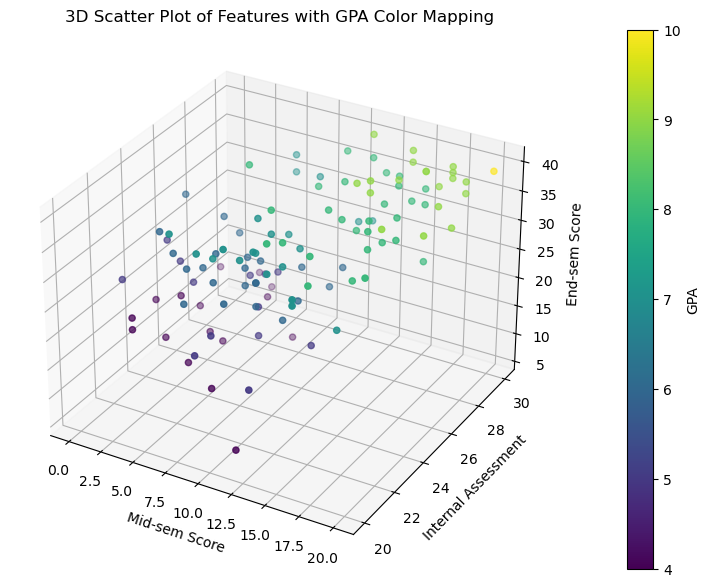

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
scatter = ax.scatter(
    grades['mid_sem_score'], 
    grades['internal_assessment'], 
    grades['end_sem_score'], 
    c=grades['gpa'], 
    cmap='viridis'
)

# Set labels
ax.set_xlabel('Mid-sem Score')
ax.set_ylabel('Internal Assessment')
ax.set_zlabel('End-sem Score')

# Add color bar to represent GPA
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('GPA')

# Title
plt.title('3D Scatter Plot of Features with GPA Color Mapping')
plt.show()


Here we try to create a linear regression model

In [10]:
from sklearn.linear_model import LinearRegression

# Create a model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [0.12491324 0.13220124 0.12712552]
Intercept: -1.6306066869108937


In [11]:
# Predict on the test set
y_pred = model.predict(X_test)

# Display predictions and actual values for the entire dataset
print("Predicted CGPA:", y_pred)
print("Actual CGPA:", y_test.values)


Predicted CGPA: [7.24074844 6.35243094 3.69958338 7.87989063 5.959993   6.3457941
 7.99530359 6.59939397 8.25684262 7.8821029  6.3457941  7.37008623
 8.79449668 4.44424587 3.93418269 6.35399205 8.52853309 8.03616814
 3.6973711  7.51751463 5.61661756 7.4817258  7.39767711 6.09089191
 8.65630977]
Actual CGPA: [7 6 4 8 6 6 8 7 8 8 6 7 9 4 4 6 9 8 4 8 6 8 7 6 9]


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.10088983595386149
R-squared: 0.9583512896491655


In [13]:
# Custom input for prediction
mid_sem_score = float(input("Enter mid-sem score (out of 20): "))
internal_assessment = float(input("Enter internal assessment score (out of 30): "))
end_sem_score = float(input("Enter end-sem score (out of 50): "))

# Predict GPA for custom inputs
custom_input = [[mid_sem_score, internal_assessment, end_sem_score]]
predicted_gpa = model.predict(custom_input)
print(f"Predicted GPA (out of 10): {predicted_gpa[0]:.2f}")

Enter mid-sem score (out of 20): 16
Enter internal assessment score (out of 30): 25
Enter end-sem score (out of 50): 39
Predicted GPA (out of 10): 8.63


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


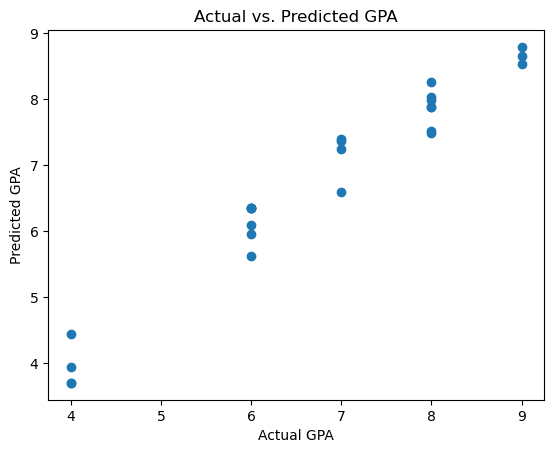

In [14]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Actual vs. Predicted GPA")
plt.show()